In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

import os
for dirname, _, filenames in os.walk('C:/Users/jhaga/OneDrive/Desktop/fr-project/Dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
!pip install tensorflow
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5


2.15.0


In [4]:
train_dir = Path('C:/Users/jhaga/OneDrive/Desktop/fr-project/Dataset/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [5]:
test_dir = Path('C:/Users/jhaga/OneDrive/Desktop/fr-project/Dataset/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [6]:
val_dir = Path('C:/Users/jhaga/OneDrive/Desktop/fr-project/Dataset/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [7]:
def image_processing(filepath):

    labels = [str(filepath[i]).split("\\")[-2]
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    df = pd.concat([filepath, labels], axis=1)

    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [8]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [9]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 2855

Number of different labels: 36

Labels: ['pineapple' 'garlic' 'capsicum' 'soy beans' 'sweetcorn' 'watermelon'
 'chilli pepper' 'sweetpotato' 'orange' 'corn' 'spinach' 'cabbage'
 'carrot' 'pomegranate' 'bell pepper' 'pear' 'cauliflower' 'mango' 'apple'
 'raddish' 'potato' 'ginger' 'onion' 'peas' 'grapes' 'beetroot' 'banana'
 'kiwi' 'tomato' 'eggplant' 'cucumber' 'turnip' 'lettuce' 'paprika'
 'lemon' 'jalepeno']


In [10]:
train_df.head(5)

,Filepath,Label
0,C:\Users\jhaga\OneDrive\Desktop\fr-project\Dat...,pineapple
1,C:\Users\jhaga\OneDrive\Desktop\fr-project\Dat...,garlic
2,C:\Users\jhaga\OneDrive\Desktop\fr-project\Dat...,capsicum
3,C:\Users\jhaga\OneDrive\Desktop\fr-project\Dat...,soy beans
4,C:\Users\jhaga\OneDrive\Desktop\fr-project\Dat...,sweetcorn


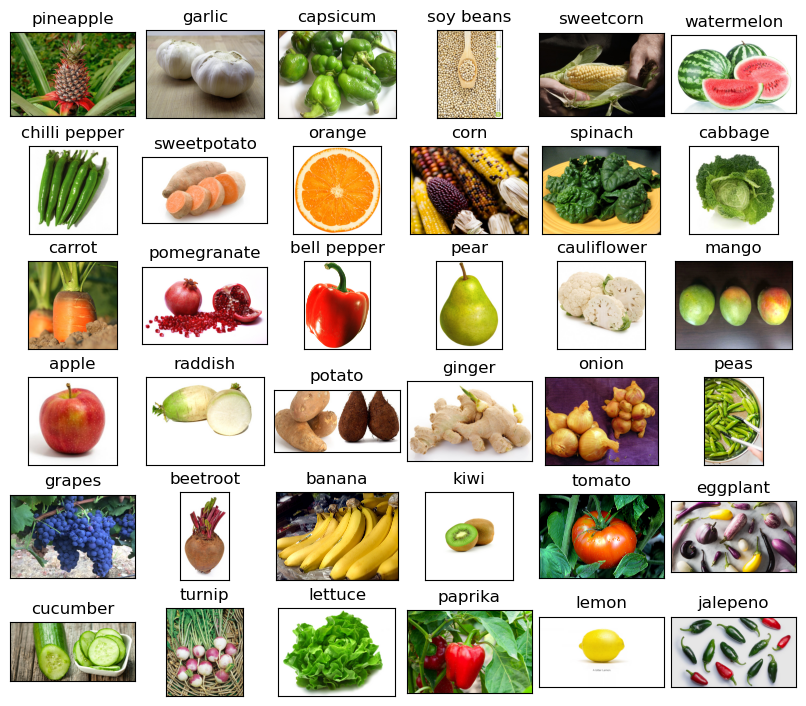

In [11]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [12]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [13]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2855 validated image filenames belonging to 36 classes.


In [14]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [15]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 340 validated image filenames belonging to 36 classes.


In [16]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False



9406464/9406464 [==============================] - 2s 0us/step


In [17]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)


Epoch 1/5


90/90 [==============================] - 135s 1s/step - loss: 1.7765 - accuracy: 0.5471 - val_loss: 0.4721 - val_accuracy: 0.8441
Epoch 2/5
90/90 [==============================] - 104s 1s/step - loss: 0.5627 - accuracy: 0.8277 - val_loss: 0.2668 - val_accuracy: 0.9235
Epoch 3/5
90/90 [==============================] - 105s 1s/step - loss: 0.3438 - accuracy: 0.8918 - val_loss: 0.2034 - val_accuracy: 0.9441
Epoch 4/5
90/90 [==============================] - 104s 1s/step - loss: 0.2176 - accuracy: 0.9349 - val_loss: 0.2206 - val_accuracy: 0.9265
Epoch 5/5
90/90 [==============================] - 177s 2s/step - loss: 0.1468 - accuracy: 0.9569 - val_loss: 0.1510 - val_accuracy: 0.9559


In [18]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 [==============================] - 17s 1s/step


['spinach',
 'orange',
 'ginger',
 'raddish',
 'orange',
 'potato',
 'eggplant',
 'cauliflower',
 'chilli pepper',
 'cabbage',
 'mango',
 'cabbage',
 'peas',
 'carrot',
 'tomato',
 'garlic',
 'pear',
 'garlic',
 'chilli pepper',
 'jalepeno',
 'eggplant',
 'lettuce',
 'pomegranate',
 'capsicum',
 'pineapple',
 'kiwi',
 'banana',
 'kiwi',
 'grapes',
 'mango',
 'pineapple',
 'pineapple',
 'apple',
 'lemon',
 'raddish',
 'corn',
 'pineapple',
 'ginger',
 'pear',
 'pear',
 'paprika',
 'capsicum',
 'cauliflower',
 'turnip',
 'banana',
 'sweetcorn',
 'eggplant',
 'mango',
 'sweetpotato',
 'cucumber',
 'spinach',
 'potato',
 'pear',
 'ginger',
 'lemon',
 'cucumber',
 'onion',
 'bell pepper',
 'carrot',
 'lemon',
 'ginger',
 'carrot',
 'banana',
 'bell pepper',
 'sweetpotato',
 'chilli pepper',
 'bell pepper',
 'cucumber',
 'pomegranate',
 'cauliflower',
 'ginger',
 'beetroot',
 'peas',
 'onion',
 'pear',
 'garlic',
 'jalepeno',
 'sweetcorn',
 'sweetcorn',
 'mango',
 'eggplant',
 'chilli pepper

In [19]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [21]:
img = output('C:/Users/jhaga/OneDrive/Desktop/fr-project/Dataset/test/beetroot/Image_8.jpg')
img

1/1 [==============================] - 1s 670ms/step


'beetroot'

In [26]:
model.save('FV.h5')